# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [109, 219, 329]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1406,16729,28986,673,836,3
1,4155,367,1390,2306,86,130
2,5113,1486,4583,5127,492,739


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

Sample #0 : Given to the high spending amount of milk and grocery, I guess this customer could be a cafe. Cafes typically serve their customers with various drinks (which made of milks) and cakes (their ingredients obtained from grocery stores).

Sample #1 : Given to the relatively low spending amount of all six product categories, I would say this customer is a normal household.

Sample #2 : Given to the high spending amount of "Frozen" products, I think this customer is a person that re-sell food products, especially frozen foods, in traditional markets.

Having said that, I think the mean values provide a great help in figuring out what kind of establishment that my samples might be.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
#removed_feature = 'Delicatessen' #The R^2 score is  -1.19398877331
#removed_feature = 'Fresh' #The R^2 score is  -0.263142985769
#removed_feature = 'Milk' #The R^2 score is  0.140006272825
removed_feature = 'Grocery' #The R^2 score is  0.713984573786
#removed_feature = 'Frozen' #The R^2 score is  -1.11452811254
#removed_feature = 'Detergents_Paper' #The R^2 score is  0.78441415529

new_data = data.drop(removed_feature, axis = 1)
target_data = data[removed_feature]

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
from sklearn.model_selection import train_test_split

# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, target_data, test_size = 0.25, random_state = 50)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 40)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)

print('The R^2 score is ', score)

importances = list(zip(regressor.feature_importances_, data.columns))
importances.sort(reverse=True)
print('The feature that are important in this prediction are ', importances)


The R^2 score is  0.713984573786
The feature that are important in this prediction are  [(0.87034642835743026, 'Frozen'), (0.065126708543896322, 'Milk'), (0.025201023230176478, 'Detergents_Paper'), (0.023455936124015097, 'Fresh'), (0.01586990374448179, 'Grocery')]


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

I attempted to predict the "Grocery" product. I found its R^2 score is 0.71. 

Based on the feature importance analysis, it is interesting to see that that the purchase of "Frozen" products influences the purchase of "Grocery" products.

Therefore, the feature "Grocery" is necessary for identifying customers' spending habits, particulary customers' habit in buying "Frozen" products.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


Correlation Values
                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


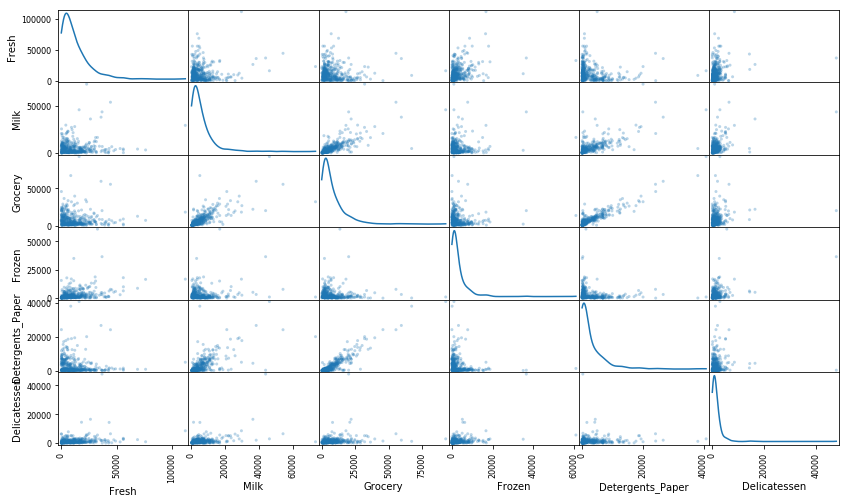

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

print("Correlation Values")
print(data.corr())

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

I think all plots consist of some outliers. <br> 
Moreover, I noticed that only a few plots that show 'normal probability plots/normal test plots'. The rest of plots tend to display a large number of data points that sit near 0.
In other words, I think most of the data are not normally distributed.

Below is my observation regarding to the correlation of each product category:

- The 'Fresh' plot looks less correlated to other product categories since most data points tend to gather at near 0. <br> <br> 

- The 'Milk' plot forms a linear correlation against 'Grocery' and 'Detergents_Paper', while showing less correlation to the other product categories. <br> <br> 

- The 'Grocery' plot forms a linear correlation against 'Milk' and 'Detergents_Paper'. Moreover, the 'Grocery' plot forms a negative relationship (opposite correlation) against 'Fresh' and 'Frozen'. This means, when the value of 'Grocery' increases, the values of both 'Fresh' and 'Frozen' tend to be decreased. <br> <br> 

- The 'Frozen' plot seems less correlated to all product categories. However, the 'Frozen' plot forms an opposite correlation against 'Grocery' and 'Detergents Paper'. <br> <br> 

- The 'Detergents Paper' plot seems correlated with 'Milk' and 'Grocery'. Furthermore, it forms an opposite correlation against 'Fresh' and 'Frozen'. <br> <br> 

- Finally, the 'Delicatessen' does not seems correlated to all product categories. <br> <br> 

In Question 2, I thought that the feature 'Grocery' is necessary for identifying customers' spending habits in buying 'Frozen' products. <br>
Having looked at the scatter plot, it looks like 'Grocery' is correlated against 'Frozen', although they have an opposite correlation. <br>

The instruction of this question suggests, if a feature is relevant for identifying a specific customer, then the scatter plot *may not show any correlation* between that feature and the others. <br>
Hence, since 'Grocery' seems correlated against 'Frozen', I think 'Grocery' might not be relevant for predicting the purchase of 'Frozen'.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

Correlation Values After Scaling:
                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000 -0.019834 -0.132713  0.383996         -0.155871   
Milk             -0.019834  1.000000  0.758851 -0.055316          0.677942   
Grocery          -0.132713  0.758851  1.000000 -0.164524          0.796398   
Frozen            0.383996 -0.055316 -0.164524  1.000000         -0.211576   
Detergents_Paper -0.155871  0.677942  0.796398 -0.211576          1.000000   
Delicatessen      0.255186  0.337833  0.235728  0.254718          0.166735   

                  Delicatessen  
Fresh                 0.255186  
Milk                  0.337833  
Grocery               0.235728  
Frozen                0.254718  
Detergents_Paper      0.166735  
Delicatessen          1.000000  


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  # This is added back by InteractiveShellApp.init_path()


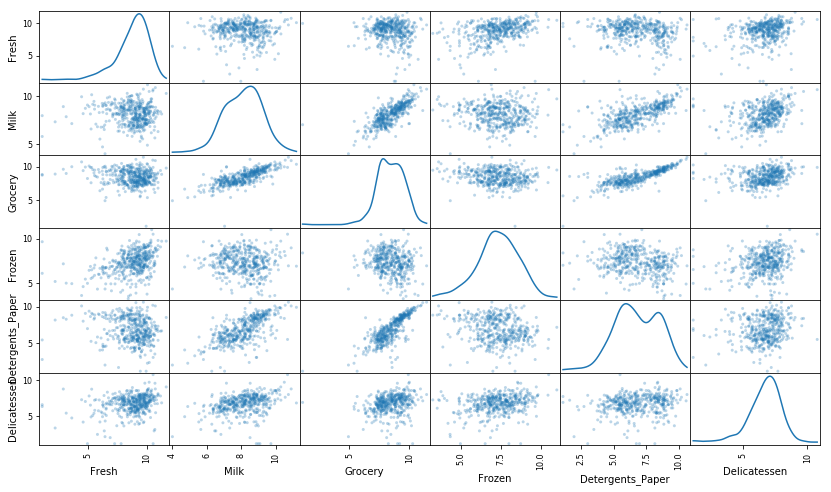

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

print("Correlation Values After Scaling:")
print(log_data.corr())

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
1,8.332068,5.905362,7.237059,7.743270,4.454347,4.867534
2,8.539542,7.303843,8.430109,8.542276,6.198479,6.605298


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [66, 95, 96, 218, 338, 75, 38, 65, 420, 122, 142, 154, 161, 177, 204, 237, 289, 338, 356, 402, 128, 
            137, 184, 187, 203, 233, 285, 289]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

Based on the result above, there are outliers in more than one feature. 

I think that we should remove outliers from our dataset because otherwise, they could skew our clustering result. <br> 
However, if removing outliers will make a class imbalanced, then we might want to consider removing the class that consists of too many outliers. As a result, we can gain a better clustering performance.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

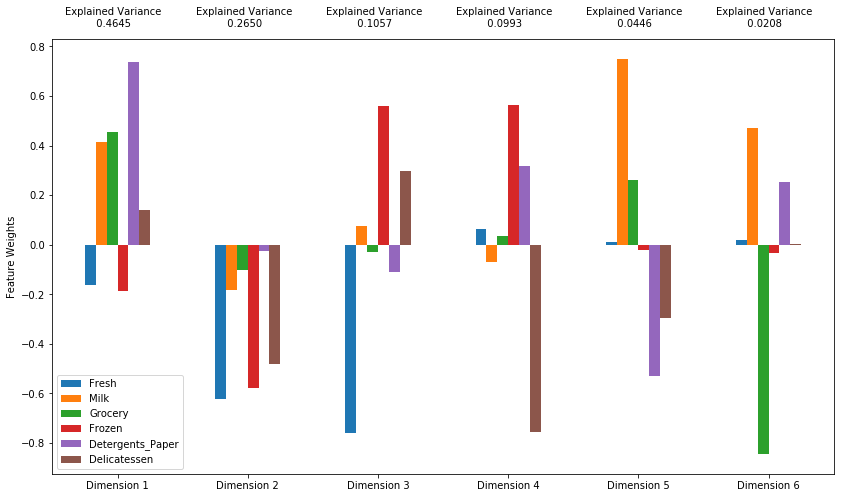

In [10]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
my_PCA = PCA()
pca = my_PCA.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The total variance in the first and second principal component is 0.7337.

The total variance of the first four principal components is 0.9374

Now I will elaborate my analysis on the above visualization.

Dimension 1: this dimension represents the positive variance of customer spending on 'detergents paper', 'grocery', and milk. Furthermore, this dimension explains the negative variance of customer spending on 'fresh' and 'frozen'.

Given that the explained variance of this dimension almost account half of the total variance (0.4694), it is safe to say that the features explained in this dimension have a high variance.

Dimension 2: this dimension represents the negative variance of all product categories.

Dimension 3: this dimension represents a high negative variance of 'fresh' products and a decent level of positive variance of 'frozen' and 'delicatessen'.

Dimension 4: this dimension represents a very high positive variance of 'delicatessen' and a decent level of negative variance of 'frozen' and 'detergents paper'.

Dimension 5: this dimension represents a very high positive variance of 'milk' and a decent level of negative variance of 'delicatessen' and 'detergents paper'.

Dimension 6: this dimension represents a very high negative variance of 'grocery'.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.9704,3.7499,-0.8762,3.6075,3.4114,-0.8340
1,-3.5452,1.6110,0.1544,0.9666,-0.1729,-0.6510
2,-1.0808,-0.2424,0.8449,0.6158,-0.2676,-0.5797


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
my_PCA = PCA(n_components=2)
pca = my_PCA.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.9704,3.7499
1,-3.5452,1.6110
2,-1.0808,-0.2424


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

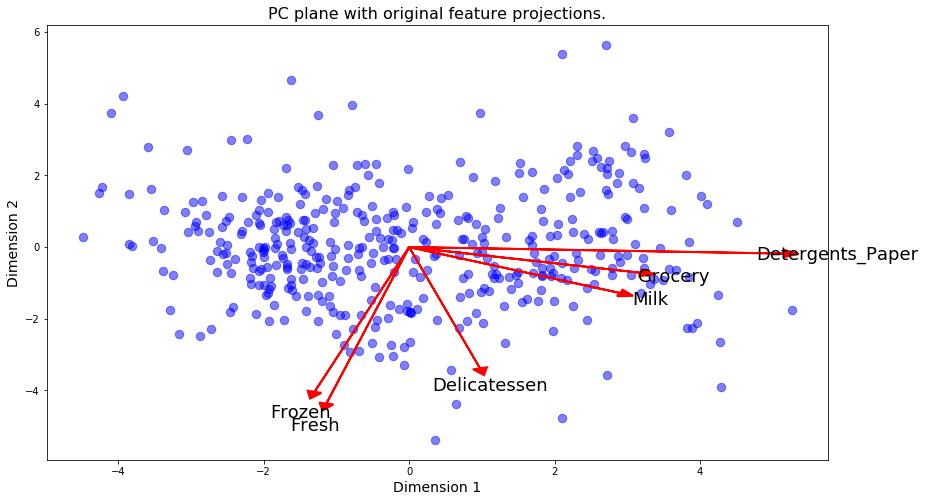

In [14]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

The advantages of using K-Means clustering algorithm are:
- Easy to implement
- Easy to understand the clustering result
- Efficient computational cost

The advantages of using Gaussian Mixture Model clustering algorithm are:
- Soft clustering (sample membership of multiple clusters)
- Cluster shape flexibility. In other words, a cluster can contain another cluster inside of it

Having looked at the biplot in the above figure, I think Gaussian Mixture Model might be a better clustering algorithm for our case because our data does not have enough separation between groups of data (clusters). In other words, our data is very compact. <br> 
In this case, K-Means will not yield to a good clustering result because it would be difficult to place centroids in such compact data.

On the other hand, Gaussian Mixture Model able to retrieve the distributions of original features from a mixture of features. Since our original features have been packed/compressed into principal components by PCA, I guess Gaussian Mixture Model will be able to retrieve the distributions of our original features from the principal components.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:
from sklearn.mixture import GaussianMixture

# TODO: Apply your clustering algorithm of choice to the reduced data 
num_clusters = 2
clusterer = GaussianMixture(n_components=num_clusters).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

from sklearn.metrics import silhouette_score
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(X=reduced_data, labels=preds)
print("The Silhouette Score of",num_clusters, "clusters is", score)
"""
The Silhouette Score of 2 clusters is 0.439238810944
The Silhouette Score of 3 clusters is 0.380143933256
The Silhouette Score of 4 clusters is 0.26035232553
The Silhouette Score of 5 clusters is 0.312355971956
The Silhouette Score of 6 clusters is 0.338157279704
The Silhouette Score of 7 clusters is 0.333935803936
The Silhouette Score of 8 clusters is 0.321838543489
The Silhouette Score of 9 clusters is 0.360701290201
The Silhouette Score of 10 clusters is 0.266771582023
The Silhouette Score of 20 clusters is 0.323393187126
The Silhouette Score of 30 clusters is 0.299755929737
The Silhouette Score of 40 clusters is 0.296171349944
The Silhouette Score of 50 clusters is 0.284489870219
"""

The Silhouette Score of 2 clusters is 0.439238810944


'\nThe Silhouette Score of 2 clusters is 0.439238810944\nThe Silhouette Score of 3 clusters is 0.380143933256\nThe Silhouette Score of 4 clusters is 0.26035232553\nThe Silhouette Score of 5 clusters is 0.312355971956\nThe Silhouette Score of 6 clusters is 0.338157279704\nThe Silhouette Score of 7 clusters is 0.333935803936\nThe Silhouette Score of 8 clusters is 0.321838543489\nThe Silhouette Score of 9 clusters is 0.360701290201\nThe Silhouette Score of 10 clusters is 0.266771582023\nThe Silhouette Score of 20 clusters is 0.323393187126\nThe Silhouette Score of 30 clusters is 0.299755929737\nThe Silhouette Score of 40 clusters is 0.296171349944\nThe Silhouette Score of 50 clusters is 0.284489870219\n'

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

Below are the silhouette scores of different cluster numbers that I have tried:
- The Silhouette Score of 2 clusters is 0.439238810944
- The Silhouette Score of 3 clusters is 0.380143933256
- The Silhouette Score of 4 clusters is 0.26035232553
- The Silhouette Score of 5 clusters is 0.312355971956
- The Silhouette Score of 6 clusters is 0.338157279704
- The Silhouette Score of 7 clusters is 0.333935803936
- The Silhouette Score of 8 clusters is 0.321838543489
- The Silhouette Score of 9 clusters is 0.360701290201
- The Silhouette Score of 10 clusters is 0.266771582023
- The Silhouette Score of 20 clusters is 0.323393187126
- The Silhouette Score of 30 clusters is 0.299755929737
- The Silhouette Score of 40 clusters is 0.296171349944
- The Silhouette Score of 50 clusters is 0.284489870219

It looks like the best clustering result can be achieved if we set the number of clusters to 2.



### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

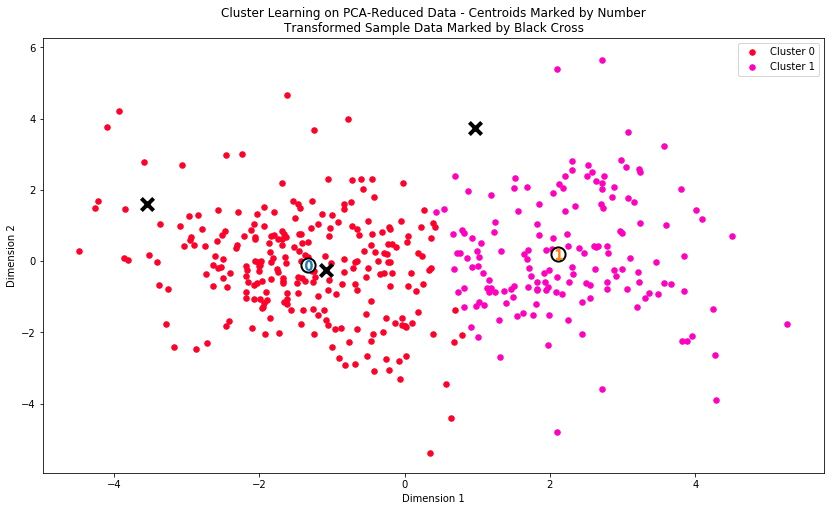

In [16]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [17]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9150.0,2054.0,2659.0,2150.0,369.0,769.0
Segment 1,4310.0,8098.0,12363.0,948.0,4649.0,1071.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

In most product categories, the cluster center values of of Segment 0 are above the mean value of the corresponding product categories. <br>
Therefore, I would argue that Segment 0 represents a set of customers (establishments) that buy products from wholesale distributors, with the goal of re-selling the products. The examples of such customers are restaurants, cafes, and so on. <br>
Because these customers want to re-sell their products, they have to buy products from wholesale distributors in bulk everyday.

On the other hand, the cluster center value of of Segment 1 in all product categories are lower than the mean value of the corresponding product categories. <br>
Thus, I would argue that Segment 1 represents a set of customers who buy products from wholesale distributors for their own use. These customers could be individuals that buy groceries for their family. <br>
The customers in Segment 1 buy a significantly lower number of products from wholesale distributors than the ones in Segment 2, because the customers in Segment 1 don't use the products from wholesale distributors in a large quantity (recall that customers in Segment 1 buy products from wholesale distributors for their own use).

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [18]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

In Question 1, I mentioned that:

- Sample #0 could be a cafe
- Sample #1 could be a normal household.
- Sample #2 could be a person that re-sell food products, especially frozen foods, in traditional markets.

So, I think:

- Sample #0 should be in Segment 0
- Sample #1 should be in Segment 1
- Sample #2 should be in Segment 0

However, when I ran the code above, I got:

- Sample point 0 predicted to be in Segment 0
- Sample point 1 predicted to be in Segment 1
- Sample point 2 predicted to be in Segment 1

Thus, there is a discrepancy between the segment prediction made by me and the code. <br>
I would say this is because in Sample #2, the values of most product categories are below the mean, except the value of 'Frozen' product which is above the mean. <br>
Hence, because the values of most of product categories in Sample #2 is below the mean, the code predicts Sample #2 to be in Segment 1.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

First, I would take 10 % of each *customers that react positively* from *each segment* that is found by the clustering algorithm. For simplicity, I will name these customers as "test customers".

Then, I would apply A/B testing to test customers, gauge their reaction, and evaluate whether they still react positively to our offering or not.

The way to measure positive reaction is not explained by this question. But I guess I would measure positive reaction by rating system or sentiment analysis on the test customers.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We can train a supervised learning algorithm as in SVM or Random Forest to predict the customer segment of each new customer.

For training the algorithm, we can use the existing customer data that contain the customer segment information. In this case, we use this customer segment information as our target variable.

After we train the algorithm, we can feed the new customer data to the algorithm and try to predict the customer segment of the new customer.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

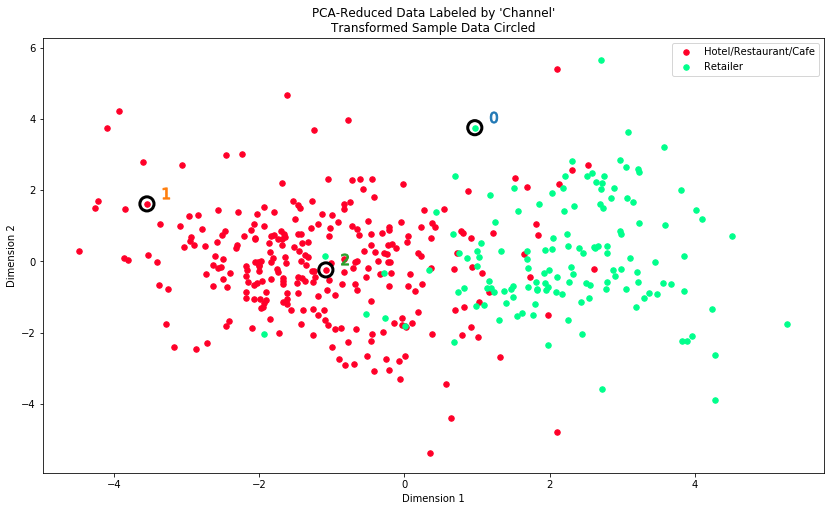

In [19]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

I think that adding the "Channel" feature to the dataset, requires us to tune the parameter of our clustering algorithm because as we can see in the plot, there are several points which seem misclassified (i.e. red points in the green cluster and vice versa).<br>
Therefore, I would say that adding a new feature to the dataset, reduces the performance of our current clustering algorithm. 

Having looked at the plot, I would say that there is no customer segments that can be classified as pure "Retailers" or "Hotels/Restaurants/Cafes".

Finally, I think the classification shown in this plot, does not adhere to the definition of customer segments that have been defined in the previous question. <br>
The underlying reason is, given there are several misclassified points, there will be some points that don't adhere to a customer segment.

For example, recall that from the previous customer segment definition, customer segment 1 represents a set of customers who buy products from wholesale distributors for their own use. <br>
Now, in the above plot, there are several points clustered under the Segment 1, but they seem to have values that closer to the Segment 2. <br>
Hence, we cannot call these points as Segment 1 because they do not have values that closer to the values of other points under Segment 1. In other words, these points are not totally adhered to Segment 1.





> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.